In [1]:
import socket
import pickle
import struct
import cv2
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Create socket to communicate with Raspberry PI

In [2]:
rPiIP = '192.168.0.183'
rPiPort = 50000

In [9]:
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.setsockopt(socket.IPPROTO_TCP, socket.TCP_NODELAY, 1)
s.connect((rPiIP, rPiPort))

Method to send data to Raspberry PI

In [4]:
def send(s, data):
    data = pickle.dumps(data)
    s.sendall(struct.pack('>i', len(data)))
    s.sendall(data)

Method to receive data from Raspberry Pi

In [5]:
def recv(s):
    data = s.recv(4, socket.MSG_WAITALL)
    data_len = struct.unpack('>i', data)[0]    
    data = s.recv(data_len, socket.MSG_WAITALL)    
    return pickle.loads(data)

Method to grab a still from the camera, optionally resize it and switch colors from BGR to RGB (to display with pytplot imshow)

In [6]:
def grabCameraStill(camera = cv2.VideoCapture(0), fixColors = False, resizePct = 100):
    retVal, image  = camera.read()
    if (fixColors):
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if (resizePct != 100): 
        image = cv2.resize(image, (int(image.shape[1] * resizePct / 100), int(image.shape[0] * resizePct / 100)))
    return image

In [11]:
send(s, (0, 0))
print(recv(s))

17:54:35


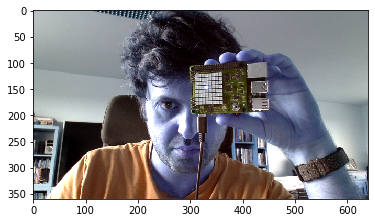

In [75]:
img = grabCameraStill(resizePct = 50)
plt.imshow(img)

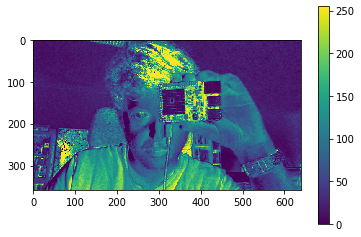

In [76]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv[:,:,1]); colorbar();   # [:,:,0] will display the hue of every pixel, [:,:,1] the saturation

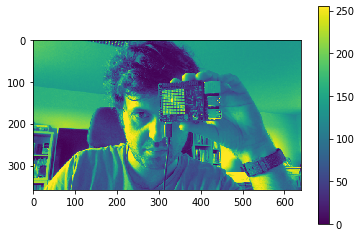

In [77]:
hlsfull = cv2.cvtColor(img, cv2.COLOR_BGR2HLS_FULL)
plt.imshow(hlsfull[:,:,1]); colorbar();

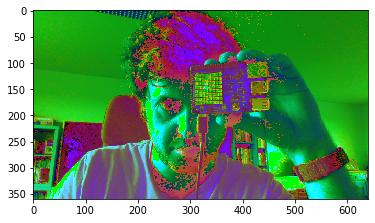

In [78]:
hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
plt.imshow(hls)

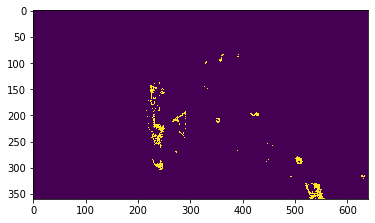

In [79]:
mask = (hlsfull[:,:,1] > 200) & (hlsfull[:,:,2] > 250) & (hlsfull[:,:,0] < 30)
plt.imshow(mask);

In [48]:
upper = np.array([255, 230, 230])
lower = np.array([255, 0, 0])

In [49]:
mask = cv2.inRange(img, lower, upper)
output = cv2.bitwise_and(img, img, mask = mask)

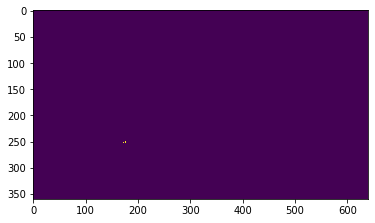

In [50]:
plt.imshow(mask)

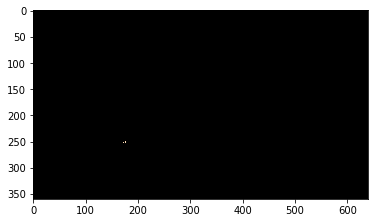

In [51]:
plt.imshow(output)

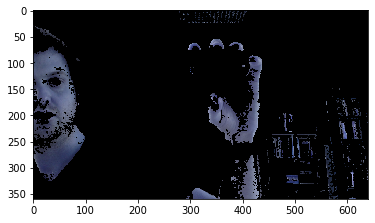

In [53]:
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(hsv, lower_red, upper_red)

# join my masks
mask = mask0+mask1
output = cv2.bitwise_and(img, img, mask = mask0)


plt.imshow(output)

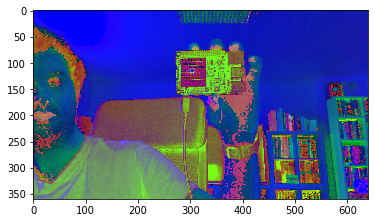

In [54]:
plt.imshow(hsv)

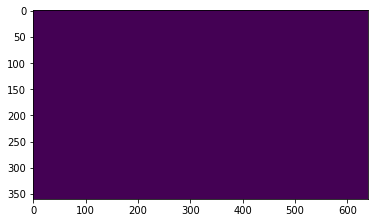

In [60]:
upper = np.array([161, 155, 84])
lower = np.array([179, 255, 255])
plt.imshow(cv2.inRange(hsv, lower, upper))

In [80]:
? cv2